In [25]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.src.utils.data_utils import get_file
import keras_vggface
from keras_vggface.vggface import VGGFace
import mtcnn
import keras_vggface.utils
import PIL
import os
import os.path



In [20]:
vggface = VGGFace(model='vgg16')



580070376/580070376 [==============================] - 168s 0us/step


In [21]:
print(vggface.summary())
print(f"Inputs: {vggface.inputs}")
print(f"Outputs: {vggface.outputs}")

Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [22]:
!mkdir public_images
!wget -O puiblic_images/scalia.jpg 'https://commons.wikimedia.org/wiki/File:Antonin_Scalia_Official_SCOTUS_Portrait.jpg'

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
scalia_photo = plt.imread('public_images/scalia.jpg')
scalia_photo.shape

(600, 480, 3)

In [27]:
face_detector = mtcnn.MTCNN()
face_roi = face_detector.detect_faces(scalia_photo)

1/1 [==============================] - 0s 199ms/step


In [28]:
face_roi

[{'box': [170, 79, 96, 123],
  'confidence': 0.9994869232177734,
  'keypoints': {'left_eye': (188, 132),
   'right_eye': (229, 124),
   'nose': (202, 153),
   'mouth_left': (195, 174),
   'mouth_right': (237, 166)}}]

In [29]:
x1, y1, width, height = face_roi[0]['box']
x2, y2 = x1 + width, y1 + height
face = scalia_photo[y1:y2, x1:x2]
print(face.shape)

(123, 96, 3)


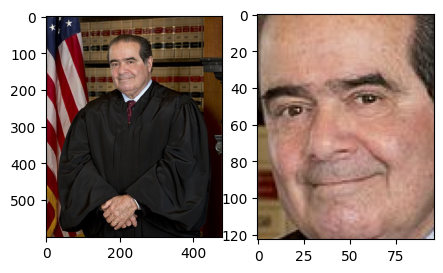

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5,3))
axes[0].imshow(scalia_photo)
axes[1].imshow(face)
plt.show()

In [44]:
print(face.shape)
image = face.reshape(1,224,224,3)
face_prediction = np.asarray(image)
print(face_prediction.shape)
predictions = vggface.predict(face_prediction)

(123, 96, 3)


ValueError: cannot reshape array of size 35424 into shape (1,224,224,3)